### Fuzzy System

In [31]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [32]:
quality = ctrl.Antecedent(np.arange(0, 11, 1), "quality")
service = ctrl.Antecedent(np.arange(0, 11, 1), "service")
tip = ctrl.Consequent(np.arange(0, 11, 1), "tip")

In [33]:
quality["poor"] = fuzz.trimf(quality.universe, [0, 0, 5])
quality["average"] = fuzz.trimf(quality.universe, [0, 5, 10])
quality["good"] = fuzz.trimf(quality.universe, [5, 10, 10])

service["poor"] = fuzz.trimf(service.universe, [0, 0, 5])
service["average"] = fuzz.trimf(service.universe, [0, 5, 10])
service["good"] = fuzz.trimf(service.universe, [5, 10, 10])

tip["low"] = fuzz.trimf(tip.universe, [0, 0, 5])
tip["medium"] = fuzz.trimf(tip.universe, [0, 5, 10])
tip["high"] = fuzz.trimf(tip.universe, [5, 10, 10])

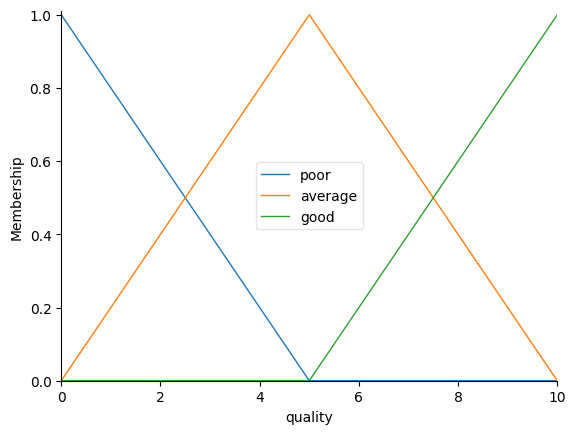

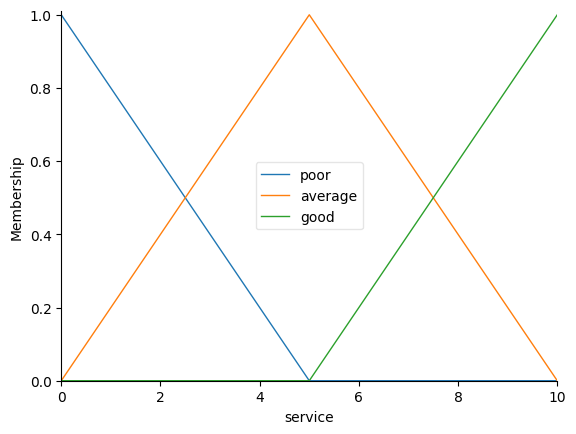

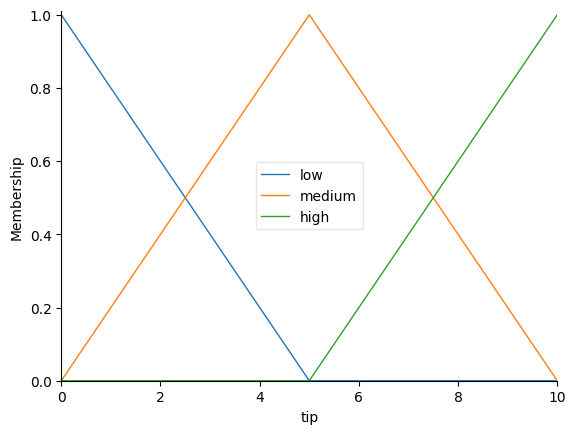

In [34]:
quality.view()
service.view()
tip.view()

In [35]:
rule1 = ctrl.Rule(quality["poor"] | service["poor"], tip["low"])
rule2 = ctrl.Rule(quality["average"] | service["average"], tip["medium"])
rule3 = ctrl.Rule(quality["good"] | service["good"], tip["high"])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping_system = ctrl.ControlSystemSimulation(tipping_ctrl)

In [37]:
tipping_system.input["quality"] = 10
tipping_system.input["service"] = 10

tipping_system.compute()

tipping_system.output["tip"]

8.333333333333334